In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import pandas_profiling as pp
from boruta import BorutaPy
from scipy import stats

In [2]:
from sklearn.model_selection import cross_val_score
from sklearn import metrics, preprocessing
from sklearn.model_selection import train_test_split, cross_validate
from sklearn.preprocessing import StandardScaler
from sklearn import linear_model
from   sklearn.metrics  import mean_squared_error,r2_score,accuracy_score,f1_score

In [3]:
import warnings
warnings.filterwarnings('ignore')

In [4]:
df=pd.read_csv('Agriculture.csv')

In [5]:
df = np.log(df.select_dtypes(include=['float64','int64'])+1).join(df.select_dtypes(include=['object']))

In [6]:
df.dropna(inplace=True)

In [7]:
from sklearn.preprocessing import LabelEncoder
label_encoder = LabelEncoder()

In [8]:
df['Crop Name']= label_encoder.fit_transform(df['Crop Name'])
df['State Name']= label_encoder.fit_transform(df['State Name'])
df['Season']= label_encoder.fit_transform(df['Season'])
df['City Name']= label_encoder.fit_transform(df['City Name'])
df['Input Cost\n(High/Medium/Low)']= label_encoder.fit_transform(df['Input Cost\n(High/Medium/Low)'])
df['Market Price\n(High/Medium/Low)']= label_encoder.fit_transform(df['Market Price\n(High/Medium/Low)'])
df['Return\n(High/Moderate/Low)']= label_encoder.fit_transform(df['Return\n(High/Moderate/Low)'])

In [9]:
df.head()

,Crop_Year,Area,Production,Rain Fall,Production per Area,State Name,City Name,Season,Crop Name,Input Cost (High/Medium/Low),Market Price (High/Medium/Low),Return (High/Moderate/Low)
0,7.601402,7.134891,7.601402,6.405559,0.953547,0,427,1,2,2,1,0
1,7.601402,1.098612,0.693147,6.405559,0.405465,0,427,1,74,0,0,1
2,7.601402,4.634729,5.774552,6.405559,1.422399,0,427,1,95,1,1,0
3,7.601402,5.176150,6.464588,7.231721,1.535155,0,427,4,7,1,1,0
4,7.601402,6.580639,5.111988,7.231721,0.206336,0,427,4,22,0,0,1


In [10]:
from sklearn.model_selection import KFold
from sklearn.model_selection import GridSearchCV
from sklearn.tree import DecisionTreeClassifier
from sklearn import metrics
from sklearn.metrics import accuracy_score,f1_score,recall_score,precision_score, confusion_matrix

# KNN

In [11]:
X=df.drop(['Market Price\n(High/Medium/Low)','Return\n(High/Moderate/Low)'],axis=1)
y=df['Market Price\n(High/Medium/Low)']

In [12]:
from sklearn.neighbors import KNeighborsClassifier
KNN = KNeighborsClassifier()

In [13]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.33, random_state=42)

In [ ]:
KNN.fit(X,y)
KNN_pred_test=KNN.predict(X_test)
KNN_pred_train=KNN.predict(X_train)

KNN_accuracy_test=KNN.score(X_test,y_test)
KNN_accuracy_train=KNN.score(X_train,y_train)

KNN_cv_results = cross_validate(KNN, X, y, cv=3)
KNN_CV_accuracy_test=KNN_cv_results['test_score'].mean()
KNN_CV_accuracy_train=KNN_cv_results['train_score'].mean()

print('KNN accuracy train  :',KNN_accuracy_train)
print('KNN accuracy test  :',KNN_accuracy_test)

print('KNN CV accuracy train :',KNN_CV_accuracy_train)
print('KNN CV accuracy test  :',KNN_CV_accuracy_test)

# Grid Search

In [ ]:
param_grid={'metric':('minkowski','euclidean'), 'n_neighbors':(5,11,14)}
KNN_GS=GridSearchCV(estimator=KNN,param_grid=param_grid,cv=3,n_jobs=-1,verbose=1)
KNN_GS.fit(X_train,y_train).best_params_

In [14]:
KNN = KNeighborsClassifier(metric= 'minkowski', n_neighbors= 5)
KNN.fit(X,y)
KNN_pred_test=KNN.predict(X_test)
KNN_pred_train=KNN.predict(X_train)

KNN_accuracy_test=KNN.score(X_test,y_test)
KNN_accuracy_train=KNN.score(X_train,y_train)

KNN_cv_results = cross_validate(KNN, X, y, cv=3,scoring=['accuracy','f1_micro','f1_macro'])
KNN_CV_accuracy_test=KNN_cv_results['test_accuracy'].mean()
KNN_CV_accuracy_train=KNN_cv_results['train_accuracy'].mean()

KNN_CV_f1_micro_test=KNN_cv_results['test_f1_micro'].mean()
KNN_CV_f1_micro_train=KNN_cv_results['train_f1_micro'].mean()

KNN_CV_f1_macro_test=KNN_cv_results['test_f1_macro'].mean()
KNN_CV_f1_macro_train=KNN_cv_results['train_f1_macro'].mean()

print('KNN accuracy train  :',KNN_accuracy_train)
print('KNN accuracy test  :',KNN_accuracy_test)

print('KNN CV accuracy train :',KNN_CV_accuracy_train)
print('KNN CV accuracy test  :',KNN_CV_accuracy_test)


# f1 score

KNN_f1_micro_test=f1_score(y_test, KNN_pred_test, average='micro')  
KNN_f1_micro_train=f1_score(y_test, KNN_pred_test, average='micro') 

KNN_f1_macro_test=f1_score(y_test, KNN_pred_test, average='macro')  
KNN_f1_macro_train=f1_score(y_test, KNN_pred_test, average='macro') 

print('---------f1----------')
print('KNN f1 micro test  :',KNN_f1_micro_test)
print('KNN f1 micro train  :',KNN_f1_micro_train)

print('KNN CV f1 micro test :',KNN_CV_f1_micro_test)
print('KNN CV f1 micro train :',KNN_CV_f1_micro_train)
print()

print('KNN f1 macro test  :',KNN_f1_macro_test)
print('KNN f1 macro train  :',KNN_f1_macro_train)

print('KNN CV f1 macro test :',KNN_CV_f1_macro_test)
print('KNN CV f1 macro train :',KNN_CV_f1_macro_train)

KNN accuracy train  : 0.932215720970954
KNN accuracy test  : 0.9321783541546704
KNN CV accuracy train : 0.9349194906026036
KNN CV accuracy test  : 0.49036070696750067
---------f1----------
KNN f1 micro test  : 0.9321783541546704
KNN f1 micro train  : 0.9321783541546704
KNN CV f1 micro test : 0.4903607069675006
KNN CV f1 micro train : 0.9349194906026036

KNN f1 macro test  : 0.9342112357411329
KNN f1 macro train  : 0.9342112357411329
KNN CV f1 macro test : 0.49143261641147795
KNN CV f1 macro train : 0.9368725920681804


# Naive Bayes

In [15]:
X=df.drop(['Market Price\n(High/Medium/Low)','Return\n(High/Moderate/Low)'],axis=1)
y=df['Market Price\n(High/Medium/Low)']

In [16]:
from sklearn.naive_bayes import BernoulliNB
NB = BernoulliNB()

In [17]:
from sklearn.feature_selection import RFE
rfe = RFE(NB)           
rfe = rfe.fit(X,y)
X.columns[rfe.support_]

Index(['Production', 'Production\nper Area', 'City Name', 'Season',
       'Input Cost\n(High/Medium/Low)'],
      dtype='object')

In [18]:
X=df[['Production', 'Production\nper Area', 'City Name', 'Season',
       'Input Cost\n(High/Medium/Low)']]

In [19]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.33, random_state=42)

In [20]:
NB.fit(X_train, y_train)

NB_pred_test=NB.predict(X_test)
NB_pred_train=NB.predict(X_train)

NB_accuracy_test=NB.score(X_test,y_test)
NB_accuracy_train=NB.score(X_train,y_train)

NB_cv_results = cross_validate(NB, X, y, cv=3, scoring=['accuracy','f1_micro','f1_macro'])
NB_CV_accuracy_test=NB_cv_results['test_accuracy'].mean()
NB_CV_accuracy_train=NB_cv_results['train_accuracy'].mean()

NB_CV_f1_micro_test=NB_cv_results['test_f1_micro'].mean()
NB_CV_f1_micro_train=NB_cv_results['train_f1_micro'].mean()

NB_CV_f1_macro_test=NB_cv_results['test_f1_macro'].mean()
NB_CV_f1_macro_train=NB_cv_results['train_f1_macro'].mean()


print('NB accuracy train  :',NB_accuracy_train)
print('NB accuracy test  :',NB_accuracy_test)

print('NB CV accuracy train :',NB_CV_accuracy_train)
print('NB CV accuracy test  :',NB_CV_accuracy_test)

# f1 score

NB_f1_micro_test=f1_score(y_test, NB_pred_test, average='micro')  
NB_f1_micro_train=f1_score(y_test, NB_pred_test, average='micro') 

NB_f1_macro_test=f1_score(y_test, NB_pred_test, average='macro')  
NB_f1_macro_train=f1_score(y_test, NB_pred_test, average='macro') 

print('---------f1----------')
print('NB f1 micro test  :',NB_f1_micro_test)
print('NB f1 micro train  :',NB_f1_micro_train)

print('NB CV f1 micro test :',NB_CV_f1_micro_test)
print('NB CV f1 micro train :',NB_CV_f1_micro_train)
print()

print('NB f1 macro test  :',NB_f1_macro_test)
print('NB f1 macro train  :',NB_f1_macro_train)

print('NB CV f1 macro test :',NB_CV_f1_macro_test)
print('NB CV f1 macro train :',NB_CV_f1_macro_train)

NB accuracy train  : 0.6413981047037135
NB accuracy test  : 0.6384723230603611
NB CV accuracy train : 0.6404677031040994
NB CV accuracy test  : 0.640432591765756
---------f1----------
NB f1 micro test  : 0.6384723230603611
NB f1 micro train  : 0.6384723230603611
NB CV f1 micro test : 0.640432591765756
NB CV f1 micro train : 0.6404677031040994

NB f1 macro test  : 0.5635162068982686
NB f1 macro train  : 0.5635162068982686
NB CV f1 macro test : 0.5642441974278901
NB CV f1 macro train : 0.5643374791498995


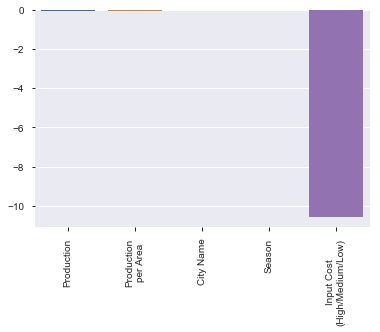

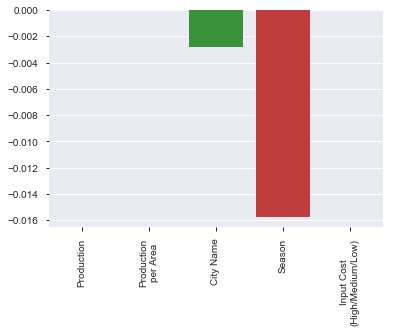

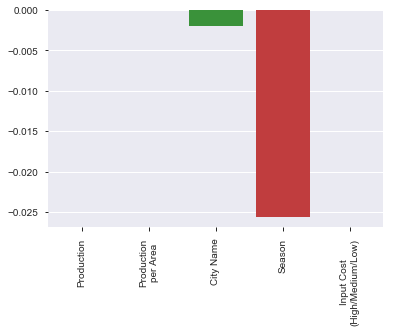

In [21]:
plt.xticks(rotation='vertical')
sns.barplot(X.columns,NB.coef_[0])
plt.show()
plt.xticks(rotation='vertical')

sns.barplot(X.columns,NB.coef_[1])
plt.show()
plt.xticks(rotation='vertical')

sns.barplot(X.columns,NB.coef_[2])
plt.show()


# Decision Tree

In [22]:
from sklearn.tree import DecisionTreeClassifier
DT=DecisionTreeClassifier()

X=df.drop(['Market Price\n(High/Medium/Low)','Return\n(High/Moderate/Low)'],axis=1)
y=df['Market Price\n(High/Medium/Low)']

from sklearn.feature_selection import RFE
rfe = RFE(DT)             # running RFE with 13 variables as output
rfe = rfe.fit(X,y)
X.columns[rfe.support_]

Index(['Production\nper Area', 'City Name', 'Season', 'Crop Name',
       'Input Cost\n(High/Medium/Low)'],
      dtype='object')

In [23]:
X=df[['Production\nper Area', 'City Name', 'Season', 'Crop Name','Input Cost\n(High/Medium/Low)']]

In [24]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.33, random_state=42)

In [ ]:
DT.fit(X_train, y_train)

DT_pred_test=DT.predict(X_test)
DT_pred_train=DT.predict(X_train)

DT_accuracy_test=DT.score(X_test,y_test)
DT_accuracy_train=DT.score(X_train,y_train)

DT_cv_results = cross_validate(DT, X, y, cv=3)
DT_CV_accuracy_test=DT_cv_results['test_score'].mean()
DT_CV_accuracy_train=DT_cv_results['train_score'].mean()

print('DT accuracy train :',DT_accuracy_train)
print('DT accuracy test  :',DT_accuracy_test)

print('DT CV accuracy train :',DT_CV_accuracy_train)
print('DT CV accuracy test  :',DT_CV_accuracy_test)

# DT Grid Search

In [ ]:
param_grid={
    'max_depth':range(2,10),
    'min_samples_leaf':range(100,400,200),
    'min_samples_split':range(20,500,200),
    'max_features':range(1,5)
}

DT_GS=GridSearchCV(estimator=DT,param_grid=param_grid,cv=3,n_jobs=-1,verbose=1)
DT_GS.fit(X_train,y_train).best_params_

DT accuracy train : 0.7424887940761201
DT accuracy test  : 0.7426958415742433
DT CV accuracy train : 0.9190316264313686
DT CV accuracy test  : 0.9264372373283685
---------f1----------
DT f1 micro test  : 0.7426958415742433
DT f1 micro train  : 0.7426958415742433
DT CV f1 micro test : 0.9190316264313686
DT CV f1 micro train : 0.9190316264313686

DT f1 macro test  : 0.7661610557390403
DT f1 macro train  : 0.7661610557390403
DT CV f1 macro test : 0.9285982953317152
DT CV f1 macro train : 0.9204112862326421


(array([0, 1, 2, 3, 4]), <a list of 5 Text xticklabel objects>)

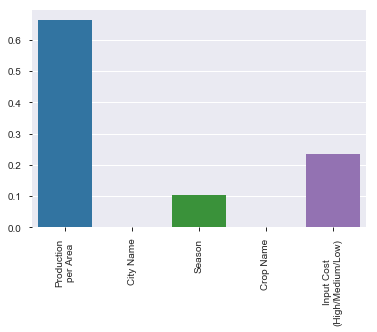

In [95]:
DT=DecisionTreeClassifier(max_depth= 2, max_features= 3, min_samples_leaf= 100, min_samples_split= 220)

DT.fit(X_train, y_train)
DT_pred_test=DT.predict(X_test)
DT_pred_train=DT.predict(X_train)

DT_accuracy_test=DT.score(X_test,y_test)
DT_accuracy_train=DT.score(X_train,y_train)

DT_cv_results = cross_validate(DT, X, y, cv=3, scoring=['accuracy','f1_micro','f1_macro'])
DT_CV_accuracy_test=DT_cv_results['test_accuracy'].mean()
DT_CV_accuracy_train=DT_cv_results['train_accuracy'].mean()
DT_CV_f1_micro_test=DT_cv_results['train_f1_micro'].mean()
DT_CV_f1_micro_train=DT_cv_results['train_f1_micro'].mean()
DT_CV_f1_macro_test=DT_cv_results['test_f1_macro'].mean()
DT_CV_f1_macro_train=DT_cv_results['train_f1_macro'].mean()

print('DT accuracy train :',DT_accuracy_train)
print('DT accuracy test  :',DT_accuracy_test)

print('DT CV accuracy train :',DT_CV_accuracy_train)
print('DT CV accuracy test  :',DT_CV_accuracy_test)

# f1 score

DT_f1_micro_test=f1_score(y_test, DT_pred_test, average='micro')  
DT_f1_micro_train=f1_score(y_test, DT_pred_test, average='micro') 

DT_f1_macro_test=f1_score(y_test, DT_pred_test, average='macro')  
DT_f1_macro_train=f1_score(y_test, DT_pred_test, average='macro') 


print('---------f1----------')
print('DT f1 micro test  :',DT_f1_micro_test)
print('DT f1 micro train  :',DT_f1_micro_train)

print('DT CV f1 micro test :',DT_CV_f1_micro_test)
print('DT CV f1 micro train :',DT_CV_f1_micro_train)
print()

print('DT f1 macro test  :',DT_f1_macro_test)
print('DT f1 macro train  :',DT_f1_macro_train)

print('DT CV f1 macro test :',DT_CV_f1_macro_test)
print('DT CV f1 macro train :',DT_CV_f1_macro_train)


In [99]:
sorted(DT.feature_importances_)

[0.0, 0.0, 0.10324573610573647, 0.2346414327040912, 0.6621128311901723]

(array([0, 1, 2, 3, 4]), <a list of 5 Text xticklabel objects>)

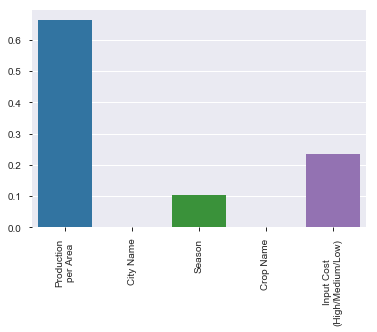

In [104]:
sns.barplot(X.columns,DT.feature_importances_)
plt.xticks(rotation='vertical')

# BEST CLASSIFICATION MODEL

,
                           'train_f1_macro':[KNN_f1_macro_train,NB_f1_macro_train,DT_f1_macro_train],
                           'test_f1_macro':[KNN_f1_macro_test,NB_f1_macro_test,DT_f1_macro_test],
                           'CV_train_macro':[KNN_CV_f1_macro_train,NB_CV_f1_macro_train,DT_CV_f1_macro_train],
                           'CV_test_macro':[KNN_CV_f1_macro_test,NB_CV_f1_macro_test,DT_CV_f1_macro_test]

In [34]:
best_model_cv=pd.DataFrame({'train_acc':[KNN_accuracy_train,NB_accuracy_train,DT_accuracy_train],
                        'test_acc':[KNN_accuracy_test,NB_accuracy_test,DT_accuracy_test],
                           'CV_accuracy_train':[KNN_CV_accuracy_train,NB_CV_accuracy_train,DT_CV_accuracy_train],
                           'CV_accuracy_test':[KNN_CV_accuracy_test,NB_CV_accuracy_test,DT_CV_accuracy_test],
                           'train_f1_micro':[KNN_f1_micro_train,NB_f1_micro_train,DT_f1_micro_train],
                           'test_f1_micro':[KNN_f1_micro_test,NB_f1_micro_test,DT_f1_micro_test],
                           'CV_train_micro':[KNN_CV_f1_micro_train,NB_CV_f1_micro_train,DT_CV_f1_micro_train],
                           'CV_test_micro':[KNN_CV_f1_micro_test,NB_CV_f1_micro_test,DT_CV_f1_micro_test]},
                        index=['KNN','NB','DT'])

In [35]:
best_model_cv

,train_acc,test_acc,CV_accuracy_train,CV_accuracy_test,train_f1_micro,test_f1_micro,CV_train_micro,CV_test_micro
KNN,0.932216,0.932178,0.934919,0.490361,0.932178,0.932178,0.934919,0.490361
NB,0.641398,0.638472,0.640468,0.640433,0.638472,0.638472,0.640468,0.640433
DT,0.764204,0.765103,0.918833,0.918828,0.765103,0.765103,0.918833,0.918833


<Figure size 720x504 with 0 Axes>

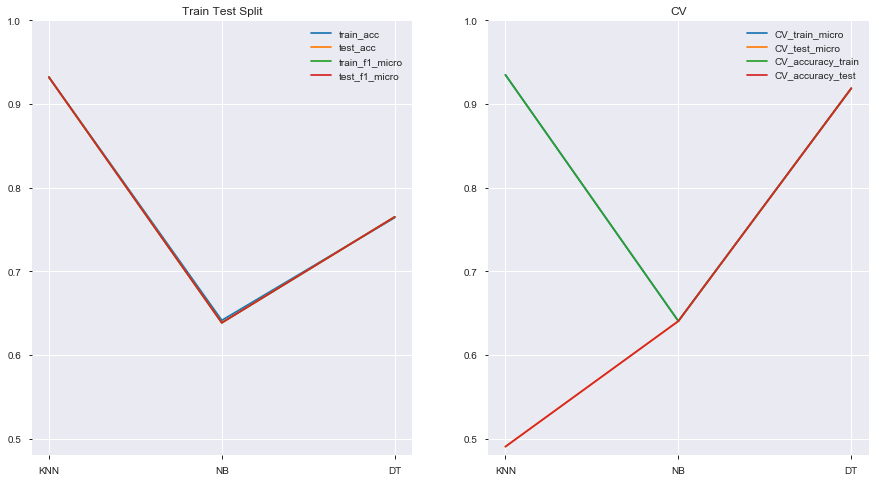

In [36]:
plt.figure(figsize=(10,7))
f,ax=plt.subplots(1,2,figsize=(15,8))
ax[0].set_ylim(0.48,1)
ax[0].set_title('Train Test Split')
ax[0].plot(best_model_cv['train_acc'])
ax[0].plot(best_model_cv['test_acc'])
ax[0].plot(best_model_cv['train_f1_micro'])
ax[0].plot(best_model_cv['test_f1_micro'])
ax[0].legend()

ax[1].set_title('CV')
ax[1].set_ylim(0.48,1)

ax[1].plot(best_model_cv['CV_train_micro'])
ax[1].plot(best_model_cv['CV_test_micro'])
ax[1].plot(best_model_cv['CV_accuracy_train'])
ax[1].plot(best_model_cv['CV_accuracy_test'])
plt.legend()
plt.show()